In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
from matplotlib.colors import LinearSegmentedColormap

In [4]:
# Load the data
df = pd.read_csv('beta_testing_pool.csv')

df['cancer_emotion'] = df['cancer_emotion'].str.replace('Hopefulness fulness', 'Hopefulness')
df['after_cancer_emotion'] = df['after_cancer_emotion'].str.replace('Hopefulness fulness', 'Hopefulness')

# Basic data cleaning
# Remove any leading/trailing whitespace in column names
df.columns = df.columns.str.strip()

df = df[~df['after_cancer_emotion'].str.contains('Focus on healthy lifestyle', na=False)]

# Function to create demographic analysis
def analyze_demographics(data):
    # Split by group
    group_e = data[data['group'] == 'E']
    group_c = data[data['group'] == 'C']
    
    # Age analysis
    print("\n## Age Demographics")
    print("\nGroup E Age Statistics:")
    print(group_e['age'].describe())
    print("\nGroup C Age Statistics:")
    print(group_c['age'].describe())
    
    # Education analysis
    print("\n## Education Demographics")
    print("\nGroup E Education Distribution:")
    print(group_e['edu'].value_counts())
    print("\nGroup C Education Distribution:")
    print(group_c['edu'].value_counts())
    
    # Sex analysis
    print("\n## Sex Demographics")
    print("\nGroup E Sex Distribution:")
    print(group_e['sex'].value_counts())
    print("\nGroup C Sex Distribution:")
    print(group_c['sex'].value_counts())
    
    # Create visualizations
    fig, axes = plt.subplots(3, 2, figsize=(15, 15))
    
    # Age histograms
    sns.histplot(group_e['age'], kde=True, ax=axes[0, 0], color='blue')
    axes[0, 0].set_title('Group E: Age Distribution')
    sns.histplot(group_c['age'], kde=True, ax=axes[0, 1], color='red')
    axes[0, 1].set_title('Group C: Age Distribution')
    
    # Education bar charts
    sns.countplot(y='edu', data=group_e, ax=axes[1, 0], palette='Blues')
    axes[1, 0].set_title('Group E: Education Levels')
    sns.countplot(y='edu', data=group_c, ax=axes[1, 1], palette='Reds')
    axes[1, 1].set_title('Group C: Education Levels')
    
    # Sex pie charts
    axes[2, 0].pie(group_e['sex'].value_counts(), labels=group_e['sex'].value_counts().index, 
                  autopct='%1.1f%%', colors=['skyblue', 'lightpink'])
    axes[2, 0].set_title('Group E: Sex Distribution')
    axes[2, 1].pie(group_c['sex'].value_counts(), labels=group_c['sex'].value_counts().index, 
                  autopct='%1.1f%%', colors=['salmon', 'lightpink'])
    axes[2, 1].set_title('Group C: Sex Distribution')
    
    plt.tight_layout()
    plt.savefig('demographics_analysis.png')
    plt.close()

# Function to analyze health information
def analyze_health_info(data):
    # Split by group
    group_e = data[data['group'] == 'E']
    group_c = data[data['group'] == 'C']
    
    # Last screening analysis
    print("\n## Last Cancer Screening")
    print("\nGroup E Last Screening Distribution:")
    print(group_e['last_screening'].value_counts())
    print("\nGroup C Last Screening Distribution:")
    print(group_c['last_screening'].value_counts())
    
    # Intention to screen
    print("\n## Intention to Screen in Next Month")
    print("\nGroup E Screening Intention:")
    print(group_e['prob_next_screening'].value_counts())
    print("\nGroup C Screening Intention:")
    print(group_c['prob_next_screening'].value_counts())
    
    # Cancer emotions
    print("\n## Cancer-Related Emotions")
    print("\nGroup E Cancer Emotions:")
    print(group_e['cancer_emotion'].value_counts())
    print("\nGroup C Cancer Emotions:")
    print(group_c['cancer_emotion'].value_counts())
    
    # Cancer knowledge confidence
    print("\n## Cancer Knowledge Confidence")
    print("\nGroup E Cancer Knowledge Confidence:")
    print(group_e['cancer_confidence'].value_counts())
    print("\nGroup C Cancer Knowledge Confidence:")
    print(group_c['cancer_confidence'].value_counts())
    
    # CHLT-6 scores
    print("\n## CHLT-6 Scores")
    print("\nGroup E CHLT-6 Scores:")
    print(group_e['CHLT-6'].value_counts())
    print("\nGroup C CHLT-6 Scores:")
    print(group_c['CHLT-6'].value_counts())
    
    # Create visualizations
    fig, axes = plt.subplots(5, 2, figsize=(15, 25))
    
    # Last screening
    sns.countplot(y='last_screening', data=group_e, ax=axes[0, 0], palette='Blues')
    axes[0, 0].set_title('Group E: Last Cancer Screening')
    sns.countplot(y='last_screening', data=group_c, ax=axes[0, 1], palette='Reds')
    axes[0, 1].set_title('Group C: Last Cancer Screening')
    
    # Screening intention
    sns.countplot(y='prob_next_screening', data=group_e, ax=axes[1, 0], palette='Blues')
    axes[1, 0].set_title('Group E: Intention to Screen')
    sns.countplot(y='prob_next_screening', data=group_c, ax=axes[1, 1], palette='Reds')
    axes[1, 1].set_title('Group C: Intention to Screen')
    
    # Cancer emotions - this is tricky because of multiple emotions
    # We'll simplify by just counting occurrences
    sns.countplot(y='cancer_emotion', data=group_e, ax=axes[2, 0], palette='Blues')
    axes[2, 0].set_title('Group E: Cancer Emotions')
    sns.countplot(y='cancer_emotion', data=group_c, ax=axes[2, 1], palette='Reds')
    axes[2, 1].set_title('Group C: Cancer Emotions')
    
    # Cancer confidence
    sns.countplot(y='cancer_confidence', data=group_e, ax=axes[3, 0], palette='Blues')
    axes[3, 0].set_title('Group E: Cancer Knowledge Confidence')
    sns.countplot(y='cancer_confidence', data=group_c, ax=axes[3, 1], palette='Reds')
    axes[3, 1].set_title('Group C: Cancer Knowledge Confidence')
    
    # CHLT-6 scores
    sns.countplot(x='CHLT-6', data=group_e, ax=axes[4, 0], palette='Blues')
    axes[4, 0].set_title('Group E: CHLT-6 Scores')
    sns.countplot(x='CHLT-6', data=group_c, ax=axes[4, 1], palette='Reds')
    axes[4, 1].set_title('Group C: CHLT-6 Scores')
    
    plt.tight_layout()
    plt.savefig('health_info_analysis.png')
    plt.close()

# Run the analyses
print("# Demographics Analysis")
analyze_demographics(df)

print("\n# Health Information Distribution")
analyze_health_info(df)

# Additional summary statistics
print("\n## Summary Statistics by Group")
group_stats = df.groupby('group').agg({
    'age': ['mean', 'std', 'min', 'max'],
    'CHLT-6': ['mean', 'median', 'min', 'max']
})
print(group_stats)

# Demographics Analysis

## Age Demographics

Group E Age Statistics:
count     9.000000
mean     32.888889
std      12.898105
min      18.000000
25%      24.000000
50%      27.000000
75%      48.000000
max      51.000000
Name: age, dtype: float64

Group C Age Statistics:
count     9.000000
mean     39.777778
std      14.566895
min      21.000000
25%      22.000000
50%      45.000000
75%      48.000000
max      59.000000
Name: age, dtype: float64

## Education Demographics

Group E Education Distribution:
edu
Bachelor       4
Master         3
High School    2
Name: count, dtype: int64

Group C Education Distribution:
edu
Bachelor    7
Master      1
PhD         1
Name: count, dtype: int64

## Sex Demographics

Group E Sex Distribution:
sex
Female    5
Male      4
Name: count, dtype: int64

Group C Sex Distribution:
sex
Female    5
Male      4
Name: count, dtype: int64


/var/folders/td/cp8pk7qn70s163f4fndy1jt40000gn/T/ipykernel_70671/2342828745.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='edu', data=group_e, ax=axes[1, 0], palette='Blues')
/var/folders/td/cp8pk7qn70s163f4fndy1jt40000gn/T/ipykernel_70671/2342828745.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='edu', data=group_c, ax=axes[1, 1], palette='Reds')



# Health Information Distribution

## Last Cancer Screening

Group E Last Screening Distribution:
last_screening
Never            4
A year ago       3
6 months ago     1
Long time ago    1
Name: count, dtype: int64

Group C Last Screening Distribution:
last_screening
Never           4
A year ago      4
6 months ago    1
Name: count, dtype: int64

## Intention to Screen in Next Month

Group E Screening Intention:
prob_next_screening
Very unlikely    2
Very likely      2
Unsure           2
Likely           2
Unlikely         1
Name: count, dtype: int64

Group C Screening Intention:
prob_next_screening
Unsure           4
Very unlikely    2
Very likely      2
Likely           1
Name: count, dtype: int64

## Cancer-Related Emotions

Group E Cancer Emotions:
cancer_emotion
Neutral                        3
Fear, Anxiety                  3
Fear                           1
Hopefulness                    1
Fear, Anxiety, Hopefulness     1
Name: count, dtype: int64

Group C Cancer Emotions:
canc

/var/folders/td/cp8pk7qn70s163f4fndy1jt40000gn/T/ipykernel_70671/2342828745.py:112: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='last_screening', data=group_e, ax=axes[0, 0], palette='Blues')
/var/folders/td/cp8pk7qn70s163f4fndy1jt40000gn/T/ipykernel_70671/2342828745.py:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='last_screening', data=group_c, ax=axes[0, 1], palette='Reds')
/var/folders/td/cp8pk7qn70s163f4fndy1jt40000gn/T/ipykernel_70671/2342828745.py:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='prob_next_screeni


## Summary Statistics by Group
             age                       CHLT-6               
            mean        std min max      mean median min max
group                                                       
C      39.777778  14.566895  21  59  4.777778    5.0   3   6
E      32.888889  12.898105  18  51  5.888889    6.0   5   6


1. What are the demographics of both group (age, education, sex)
2. What are the health information distribution (last cancer screening, intention to go screening in the next month, emotions related to cancer, cancer knowledge confidence, and their CHLT-6 score before the research) 

In [6]:
def convert_to_numeric(series, mapping):
    return series.map(mapping)

# Define mappings for categorical variables
screening_intention_map = {
    'Very unlikely': 1,
    'Unlikely': 2,
    'Unsure': 3,
    'Likely': 4,
    'Very likely': 5
}

confidence_map = {
    'Very unconfident': 1,
    'Somewhat unconfident': 2,
    'Unsure': 3,
    'Somewhat confident': 4,
    'Very confident': 5
}

# Create numeric versions of variables for statistical analysis
df['prob_next_screening_num'] = convert_to_numeric(df['prob_next_screening'], screening_intention_map)
df['after_prob_next_screening_num'] = convert_to_numeric(df['after_prob_next_screening'], screening_intention_map)
df['cancer_confidence_num'] = convert_to_numeric(df['cancer_confidence'], confidence_map)
df['after_cancer_confidence_num'] = convert_to_numeric(df['after_cancer_confidence'], confidence_map)

# Calculate changes
df['screening_intention_change'] = df['after_prob_next_screening_num'] - df['prob_next_screening_num']
df['confidence_change'] = df['after_cancer_confidence_num'] - df['cancer_confidence_num']
df['CHLT_change'] = df['after_CHLT-6'] - df['CHLT-6']

# Function to analyze emotion changes
def analyze_emotion_change(row):
    before = str(row['cancer_emotion']).lower()
    after = str(row['after_cancer_emotion']).lower()
    
    # Extract emotions using regex to handle different formats
    before_emotions = set(re.findall(r'[a-z]+fulness|[a-z]+', before))
    after_emotions = set(re.findall(r'[a-z]+fulness|[a-z]+', after))
    
    # Remove common words that aren't emotions
    stop_words = {'and', 'or', '', 'nan'}
    before_emotions = before_emotions - stop_words
    after_emotions = after_emotions - stop_words
    
    # Calculate changes
    added = after_emotions - before_emotions
    removed = before_emotions - after_emotions
    unchanged = before_emotions.intersection(after_emotions)
    
    # Classify the change
    if len(added) > 0 and 'gratitude' in added or 'hopefulness' in added or 'calm' in added:
        return 1  # Positive change
    elif len(added) > 0 and ('fear' in added or 'anxiety' in added):
        return -1  # Negative change
    elif len(removed) > 0 and ('fear' in removed or 'anxiety' in removed):
        return 1  # Positive change
    elif len(removed) > 0 and ('gratitude' in removed or 'hopefulness' in removed or 'calm' in removed):
        return -1  # Negative change
    else:
        return 0  # No significant change

# Apply emotion change analysis
df['emotion_change_score'] = df.apply(analyze_emotion_change, axis=1)

# Separate groups
group_e = df[df['group'] == 'E']
group_c = df[df['group'] == 'C']

# Create visualization functions
def create_change_visualization():
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Screening intention changes
    sns.boxplot(x='group', y='screening_intention_change', data=df, ax=axes[0, 0])
    axes[0, 0].set_title('Changes in Screening Intention by Group')
    axes[0, 0].set_ylabel('Change (Numeric Scale)')
    
    # Confidence changes
    sns.boxplot(x='group', y='confidence_change', data=df, ax=axes[0, 1])
    axes[0, 1].set_title('Changes in Cancer Knowledge Confidence by Group')
    axes[0, 1].set_ylabel('Change (Numeric Scale)')
    
    # CHLT-6 score changes
    sns.boxplot(x='group', y='CHLT_change', data=df, ax=axes[1, 0])
    axes[1, 0].set_title('Changes in CHLT-6 Scores by Group')
    axes[1, 0].set_ylabel('Score Change')
    
    # Emotion changes
    sns.countplot(x='emotion_change_score', hue='group', data=df, ax=axes[1, 1])
    axes[1, 1].set_title('Emotional Response Changes by Group')
    axes[1, 1].set_xlabel('Change (-1: Negative, 0: Neutral, 1: Positive)')
    axes[1, 1].set_ylabel('Count')
    
    plt.tight_layout()
    plt.savefig('changes_visualization.png')
    plt.close()

def create_before_after_plots():
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Screening intention before/after
    for i, group_name in enumerate(['E', 'C']):
        group_data = df[df['group'] == group_name]
        
        # Calculate means for before and after
        before_screening = group_data['prob_next_screening_num'].mean()
        after_screening = group_data['after_prob_next_screening_num'].mean()
        
        before_confidence = group_data['cancer_confidence_num'].mean()
        after_confidence = group_data['after_cancer_confidence_num'].mean()
        
        before_chlt = group_data['CHLT-6'].mean()
        after_chlt = group_data['after_CHLT-6'].mean()
        
        # Plot screening intention
        axes[0, 0].bar([i*2, i*2+1], [before_screening, after_screening], 
                      width=0.8, label=f'Group {group_name}')
        
        # Plot confidence
        axes[0, 1].bar([i*2, i*2+1], [before_confidence, after_confidence], 
                      width=0.8, label=f'Group {group_name}')
        
        # Plot CHLT-6
        axes[1, 0].bar([i*2, i*2+1], [before_chlt, after_chlt], 
                      width=0.8, label=f'Group {group_name}')
    
    # Set titles and labels
    axes[0, 0].set_title('Average Screening Intention Before/After')
    axes[0, 0].set_xticks([0.5, 1.5, 2.5, 3.5])
    axes[0, 0].set_xticklabels(['E Before', 'E After', 'C Before', 'C After'])
    
    axes[0, 1].set_title('Average Cancer Knowledge Confidence Before/After')
    axes[0, 1].set_xticks([0.5, 1.5, 2.5, 3.5])
    axes[0, 1].set_xticklabels(['E Before', 'E After', 'C Before', 'C After'])
    
    axes[1, 0].set_title('Average CHLT-6 Score Before/After')
    axes[1, 0].set_xticks([0.5, 1.5, 2.5, 3.5])
    axes[1, 0].set_xticklabels(['E Before', 'E After', 'C Before', 'C After'])
    
    # Emotion changes visualization
    emotion_counts = df.groupby(['group', 'emotion_change_score']).size().unstack(fill_value=0)
    emotion_counts.plot(kind='bar', ax=axes[1, 1])
    axes[1, 1].set_title('Distribution of Emotional Changes by Group')
    axes[1, 1].set_xlabel('Group')
    axes[1, 1].set_ylabel('Count')
    axes[1, 1].legend(['Negative Change', 'No Change', 'Positive Change'])
    
    plt.tight_layout()
    plt.savefig('before_after_comparison.png')
    plt.close()

# Statistical analysis function
def perform_statistical_analysis():
    results = {}
    
    # Screening intention change
    e_screening_change = group_e['screening_intention_change'].dropna()
    c_screening_change = group_c['screening_intention_change'].dropna()
    
    # Confidence change
    e_confidence_change = group_e['confidence_change'].dropna()
    c_confidence_change = group_c['confidence_change'].dropna()
    
    # CHLT-6 change
    e_chlt_change = group_e['CHLT_change'].dropna()
    c_chlt_change = group_c['CHLT_change'].dropna()
    
    # Emotion change
    e_emotion_change = group_e['emotion_change_score'].dropna()
    c_emotion_change = group_c['emotion_change_score'].dropna()
    
    # Within-group analysis (paired t-test or Wilcoxon)
    # For screening intention
    e_screening_before = group_e['prob_next_screening_num'].dropna()
    e_screening_after = group_e['after_prob_next_screening_num'].dropna()
    if len(e_screening_before) == len(e_screening_after):
        results['E_screening_within'] = stats.wilcoxon(e_screening_before, e_screening_after)
    
    c_screening_before = group_c['prob_next_screening_num'].dropna()
    c_screening_after = group_c['after_prob_next_screening_num'].dropna()
    if len(c_screening_before) == len(c_screening_after):
        results['C_screening_within'] = stats.wilcoxon(c_screening_before, c_screening_after)
    
    # For confidence
    e_confidence_before = group_e['cancer_confidence_num'].dropna()
    e_confidence_after = group_e['after_cancer_confidence_num'].dropna()
    if len(e_confidence_before) == len(e_confidence_after):
        results['E_confidence_within'] = stats.wilcoxon(e_confidence_before, e_confidence_after)
    
    c_confidence_before = group_c['cancer_confidence_num'].dropna()
    c_confidence_after = group_c['after_cancer_confidence_num'].dropna()
    if len(c_confidence_before) == len(c_confidence_after):
        results['C_confidence_within'] = stats.wilcoxon(c_confidence_before, c_confidence_after)
    
    # For CHLT-6
    e_chlt_before = group_e['CHLT-6'].dropna()
    e_chlt_after = group_e['after_CHLT-6'].dropna()
    if len(e_chlt_before) == len(e_chlt_after):
        results['E_chlt_within'] = stats.wilcoxon(e_chlt_before, e_chlt_after)
    
    c_chlt_before = group_c['CHLT-6'].dropna()
    c_chlt_after = group_c['after_CHLT-6'].dropna()
    if len(c_chlt_before) == len(c_chlt_after):
        results['C_chlt_within'] = stats.wilcoxon(c_chlt_before, c_chlt_after)
    
    # Between-group analysis (Mann-Whitney U test)
    results['screening_between'] = stats.mannwhitneyu(e_screening_change, c_screening_change)
    results['confidence_between'] = stats.mannwhitneyu(e_confidence_change, c_confidence_change)
    results['chlt_between'] = stats.mannwhitneyu(e_chlt_change, c_chlt_change)
    
    return results

# Execute visualization and analysis
create_change_visualization()
create_before_after_plots()
stats_results = perform_statistical_analysis()

# Print statistical results
print("## Statistical Analysis Results")
print("\n1. Within-Group Changes (Wilcoxon Signed-Rank Test)")
print("\nExperimental Group (E):")
if 'E_screening_within' in stats_results:
    print(f"Screening Intention: p-value = {stats_results['E_screening_within'].pvalue:.4f}")
if 'E_confidence_within' in stats_results:
    print(f"Cancer Knowledge Confidence: p-value = {stats_results['E_confidence_within'].pvalue:.4f}")
if 'E_chlt_within' in stats_results:
    print(f"CHLT-6 Score: p-value = {stats_results['E_chlt_within'].pvalue:.4f}")

print("\nControl Group (C):")
if 'C_screening_within' in stats_results:
    print(f"Screening Intention: p-value = {stats_results['C_screening_within'].pvalue:.4f}")
if 'C_confidence_within' in stats_results:
    print(f"Cancer Knowledge Confidence: p-value = {stats_results['C_confidence_within'].pvalue:.4f}")
if 'C_chlt_within' in stats_results:
    print(f"CHLT-6 Score: p-value = {stats_results['C_chlt_within'].pvalue:.4f}")

print("\n2. Between-Group Differences in Changes (Mann-Whitney U Test)")
print(f"Screening Intention Change: p-value = {stats_results['screening_between'].pvalue:.4f}")
print(f"Cancer Knowledge Confidence Change: p-value = {stats_results['confidence_between'].pvalue:.4f}")
print(f"CHLT-6 Score Change: p-value = {stats_results['chlt_between'].pvalue:.4f}")

# Calculate and print descriptive statistics
print("\n## Descriptive Statistics of Changes")
print("\n### Experimental Group (E)")
print(group_e[['screening_intention_change', 'confidence_change', 'CHLT_change', 'emotion_change_score']].describe())

print("\n### Control Group (C)")
print(group_c[['screening_intention_change', 'confidence_change', 'CHLT_change', 'emotion_change_score']].describe())

## Statistical Analysis Results

1. Within-Group Changes (Wilcoxon Signed-Rank Test)

Experimental Group (E):
Screening Intention: p-value = 0.7127
Cancer Knowledge Confidence: p-value = 0.0833
CHLT-6 Score: p-value = 0.5637

Control Group (C):
Screening Intention: p-value = 0.9139
Cancer Knowledge Confidence: p-value = 0.1573
CHLT-6 Score: p-value = 0.2568

2. Between-Group Differences in Changes (Mann-Whitney U Test)
Screening Intention Change: p-value = 0.4283
Cancer Knowledge Confidence Change: p-value = 0.8043
CHLT-6 Score Change: p-value = 0.2667

## Descriptive Statistics of Changes

### Experimental Group (E)
       screening_intention_change  confidence_change  CHLT_change  \
count                    9.000000           9.000000     9.000000   
mean                    -0.111111           0.333333    -0.111111   
std                      1.364225           0.500000     0.600925   
min                     -2.000000           0.000000    -1.000000   
25%                     -1.000

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_wilcoxon.py:199: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)


In [7]:
def visualize_demographics():
    # Split data by group
    group_e = df[df['group'] == 'E']
    group_c = df[df['group'] == 'C']
    
    # Create a figure with 3 subplots for age, education, and sex
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # 1. Age distribution
    sns.kdeplot(data=group_e, x='age', fill=True, color='blue', alpha=0.5, label='Experimental', ax=axes[0])
    sns.kdeplot(data=group_c, x='age', fill=True, color='red', alpha=0.5, label='Control', ax=axes[0])
    axes[0].set_title('Age Distribution by Group', fontsize=14)
    axes[0].set_xlabel('Age', fontsize=12)
    axes[0].set_ylabel('Density', fontsize=12)
    axes[0].legend()
    
    # 2. Education level
    edu_counts_e = group_e['edu'].value_counts().reset_index()
    edu_counts_e.columns = ['Education', 'Count']
    edu_counts_e['Group'] = 'Experimental'
    
    edu_counts_c = group_c['edu'].value_counts().reset_index()
    edu_counts_c.columns = ['Education', 'Count']
    edu_counts_c['Group'] = 'Control'
    
    edu_counts = pd.concat([edu_counts_e, edu_counts_c])
    
    sns.barplot(data=edu_counts, x='Education', y='Count', hue='Group', palette=['blue', 'red'], ax=axes[1])
    axes[1].set_title('Education Level by Group', fontsize=14)
    axes[1].set_xlabel('Education Level', fontsize=12)
    axes[1].set_ylabel('Count', fontsize=12)
    axes[1].tick_params(axis='x', rotation=45)
    
    # 3. Sex distribution
    sex_counts_e = group_e['sex'].value_counts().reset_index()
    sex_counts_e.columns = ['Sex', 'Count']
    sex_counts_e['Group'] = 'Experimental'
    
    sex_counts_c = group_c['sex'].value_counts().reset_index()
    sex_counts_c.columns = ['Sex', 'Count']
    sex_counts_c['Group'] = 'Control'
    
    sex_counts = pd.concat([sex_counts_e, sex_counts_c])
    
    sns.barplot(data=sex_counts, x='Sex', y='Count', hue='Group', palette=['blue', 'red'], ax=axes[2])
    axes[2].set_title('Sex Distribution by Group', fontsize=14)
    axes[2].set_xlabel('Sex', fontsize=12)
    axes[2].set_ylabel('Count', fontsize=12)
    
    plt.tight_layout()
    plt.savefig('demographic_characteristics.png', dpi=300)
    plt.close()

# Create a function to visualize health-related characteristics
def visualize_health_characteristics():
    # Split data by group
    group_e = df[df['group'] == 'E']
    group_c = df[df['group'] == 'C']
    
    # Create a figure with 4 subplots for screening, intention, confidence, and CHLT-6
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    # 1. Last screening
    screening_counts_e = group_e['last_screening'].value_counts().reset_index()
    screening_counts_e.columns = ['Last Screening', 'Count']
    screening_counts_e['Group'] = 'Experimental'
    
    screening_counts_c = group_c['last_screening'].value_counts().reset_index()
    screening_counts_c.columns = ['Last Screening', 'Count']
    screening_counts_c['Group'] = 'Control'
    
    screening_counts = pd.concat([screening_counts_e, screening_counts_c])
    
    sns.barplot(data=screening_counts, x='Last Screening', y='Count', hue='Group', palette=['blue', 'red'], ax=axes[0, 0])
    axes[0, 0].set_title('Last Cancer Screening by Group', fontsize=14)
    axes[0, 0].set_xlabel('Last Screening', fontsize=12)
    axes[0, 0].set_ylabel('Count', fontsize=12)
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # 2. Screening intention
    intention_counts_e = group_e['prob_next_screening'].value_counts().reset_index()
    intention_counts_e.columns = ['Screening Intention', 'Count']
    intention_counts_e['Group'] = 'Experimental'
    
    intention_counts_c = group_c['prob_next_screening'].value_counts().reset_index()
    intention_counts_c.columns = ['Screening Intention', 'Count']
    intention_counts_c['Group'] = 'Control'
    
    intention_counts = pd.concat([intention_counts_e, intention_counts_c])
    
    # Define the order for screening intention
    intention_order = ['Very unlikely', 'Unlikely', 'Unsure', 'Likely', 'Very likely']
    
    sns.barplot(data=intention_counts, x='Screening Intention', y='Count', hue='Group', 
               palette=['blue', 'red'], ax=axes[0, 1], order=intention_order)
    axes[0, 1].set_title('Screening Intention by Group', fontsize=14)
    axes[0, 1].set_xlabel('Screening Intention', fontsize=12)
    axes[0, 1].set_ylabel('Count', fontsize=12)
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # 3. Cancer knowledge confidence
    confidence_counts_e = group_e['cancer_confidence'].value_counts().reset_index()
    confidence_counts_e.columns = ['Confidence', 'Count']
    confidence_counts_e['Group'] = 'Experimental'
    
    confidence_counts_c = group_c['cancer_confidence'].value_counts().reset_index()
    confidence_counts_c.columns = ['Confidence', 'Count']
    confidence_counts_c['Group'] = 'Control'
    
    confidence_counts = pd.concat([confidence_counts_e, confidence_counts_c])
    
    # Define the order for confidence
    confidence_order = ['Somewhat unconfident', 'Unsure', 'Somewhat confident', 'Very confident']
    
    sns.barplot(data=confidence_counts, x='Confidence', y='Count', hue='Group', 
               palette=['blue', 'red'], ax=axes[1, 0], order=confidence_order)
    axes[1, 0].set_title('Cancer Knowledge Confidence by Group', fontsize=14)
    axes[1, 0].set_xlabel('Confidence Level', fontsize=12)
    axes[1, 0].set_ylabel('Count', fontsize=12)
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # 4. CHLT-6 scores
    sns.countplot(data=df, x='CHLT-6', hue='group', palette=['blue', 'red'], ax=axes[1, 1])
    axes[1, 1].set_title('CHLT-6 Scores by Group', fontsize=14)
    axes[1, 1].set_xlabel('CHLT-6 Score', fontsize=12)
    axes[1, 1].set_ylabel('Count', fontsize=12)
    axes[1, 1].legend(['Experimental', 'Control'])
    
    plt.tight_layout()
    plt.savefig('health_characteristics.png', dpi=300)
    plt.close()

# Create a function to visualize emotional responses
def visualize_emotions():
    # Process emotions (handling multiple emotions per person)
    emotions_e = {}
    emotions_c = {}
    
    for _, row in df.iterrows():
        group = row['group']
        emotions = str(row['cancer_emotion']).replace('fulness ', 'fulness').split(',')
        emotions = [e.strip() for e in emotions if e.strip()]
        
        for emotion in emotions:
            if group == 'E':
                emotions_e[emotion] = emotions_e.get(emotion, 0) + 1
            else:
                emotions_c[emotion] = emotions_c.get(emotion, 0) + 1
    
    # Create dataframes for plotting
    emotions_e_df = pd.DataFrame({'Emotion': list(emotions_e.keys()), 
                                 'Count': list(emotions_e.values()),
                                 'Group': 'Experimental'})
    
    emotions_c_df = pd.DataFrame({'Emotion': list(emotions_c.keys()), 
                                 'Count': list(emotions_c.values()),
                                 'Group': 'Control'})
    
    emotions_df = pd.concat([emotions_e_df, emotions_c_df])
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    sns.barplot(data=emotions_df, x='Emotion', y='Count', hue='Group', palette=['blue', 'red'])
    plt.title('Cancer-Related Emotions by Group', fontsize=16)
    plt.xlabel('Emotion', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('emotion_characteristics.png', dpi=300)
    plt.close()

# Execute the visualizations
visualize_demographics()
visualize_health_characteristics()
visualize_emotions()

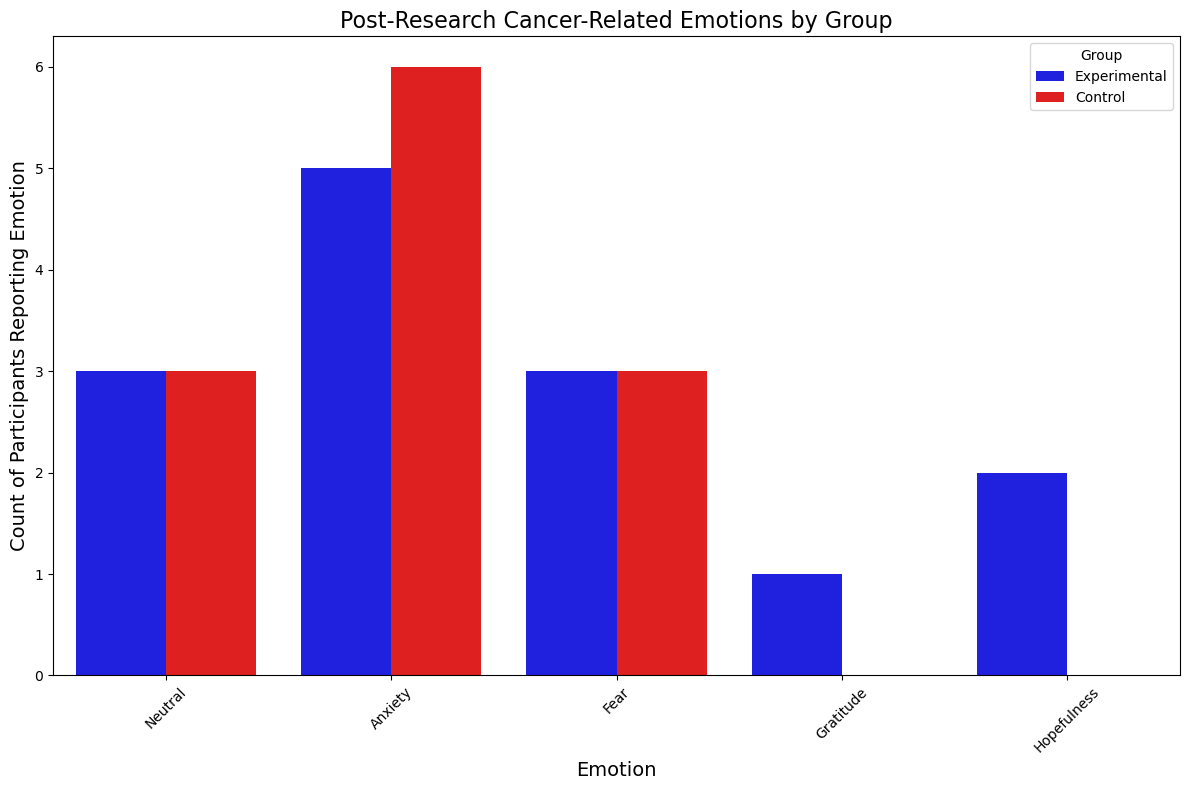

In [8]:
def visualize_health_characteristics_after():
    # Split data by group
    group_e = df[df['group'] == 'E']
    group_c = df[df['group'] == 'C']
    
    # Create a figure with 4 subplots for screening intention, cancer confidence, CHLT-6 scores, and last screening
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))
    
    # 1. Post-research screening intention
    intention_counts_e = group_e['after_prob_next_screening'].value_counts().reset_index()
    intention_counts_e.columns = ['Screening Intention', 'Count']
    intention_counts_e['Group'] = 'Experimental'
    
    intention_counts_c = group_c['after_prob_next_screening'].value_counts().reset_index()
    intention_counts_c.columns = ['Screening Intention', 'Count']
    intention_counts_c['Group'] = 'Control'
    
    intention_counts = pd.concat([intention_counts_e, intention_counts_c])
    
    # Define the order for screening intention
    intention_order = ['Very unlikely', 'Unlikely', 'Unsure', 'Likely', 'Very likely']
    
    sns.barplot(data=intention_counts, x='Screening Intention', y='Count', hue='Group', 
               palette=['blue', 'red'], ax=axes[0, 0], order=intention_order)
    axes[0, 0].set_title('Post-Research Screening Intention by Group', fontsize=14)
    axes[0, 0].set_xlabel('Screening Intention', fontsize=12)
    axes[0, 0].set_ylabel('Count', fontsize=12)
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # 2. Post-research cancer knowledge confidence
    confidence_counts_e = group_e['after_cancer_confidence'].value_counts().reset_index()
    confidence_counts_e.columns = ['Confidence Level', 'Count']
    confidence_counts_e['Group'] = 'Experimental'
    
    confidence_counts_c = group_c['after_cancer_confidence'].value_counts().reset_index()
    confidence_counts_c.columns = ['Confidence Level', 'Count']
    confidence_counts_c['Group'] = 'Control'
    
    confidence_counts = pd.concat([confidence_counts_e, confidence_counts_c])
    
    # Define the order for confidence levels
    confidence_order = ['Somewhat unconfident', 'Unsure', 'Somewhat confident', 'Very confident']
    
    sns.barplot(data=confidence_counts, x='Confidence Level', y='Count', hue='Group', 
               palette=['blue', 'red'], ax=axes[0, 1], order=confidence_order)
    axes[0, 1].set_title('Post-Research Cancer Knowledge Confidence by Group', fontsize=14)
    axes[0, 1].set_xlabel('Confidence Level', fontsize=12)
    axes[0, 1].set_ylabel('Count', fontsize=12)
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # 3. Post-research CHLT-6 scores
    sns.countplot(data=df, x='after_CHLT-6', hue='group', palette=['blue', 'red'], ax=axes[1, 0])
    axes[1, 0].set_title('Post-Research CHLT-6 Scores by Group', fontsize=14)
    axes[1, 0].set_xlabel('CHLT-6 Score (After)', fontsize=12)
    axes[1, 0].set_ylabel('Count', fontsize=12)
    
    # 4. Post-research last cancer screening (unchanged from before research)
    screening_counts_e = group_e['last_screening'].value_counts().reset_index()
    screening_counts_e.columns = ['Last Screening Timeframe', 'Count']
    screening_counts_e['Group'] = 'Experimental'
    
    screening_counts_c = group_c['last_screening'].value_counts().reset_index()
    screening_counts_c.columns = ['Last Screening Timeframe', 'Count']
    screening_counts_c['Group'] = 'Control'
    
    screening_counts = pd.concat([screening_counts_e, screening_counts_c])
    
    sns.barplot(data=screening_counts, x='Last Screening Timeframe', y='Count', hue='Group',
               palette=['blue', 'red'], ax=axes[1, 1])
    axes[1, 1].set_title('Last Cancer Screening by Group (Unchanged)', fontsize=14)
    axes[1, 1].set_xlabel('Last Screening Timeframe', fontsize=12)
    axes[1, 1].set_ylabel('Count', fontsize=12)
    
    plt.tight_layout()
    plt.savefig('health_characteristics_after.png')
    plt.close()

# Function to visualize emotions after the research
def visualize_emotions_after():
    # Process emotions (handling multiple emotions per person)
    emotions_e = {}
    emotions_c = {}
    
    for _, row in df.iterrows():
        group = row['group']
        emotions_after = str(row['after_cancer_emotion']).split(',')
        emotions_after = [e.strip() for e in emotions_after if e.strip()]
        
        for emotion in emotions_after:
            if group == 'E':
                emotions_e[emotion] = emotions_e.get(emotion, 0) + 1
            else:
                emotions_c[emotion] = emotions_c.get(emotion, 0) + 1
    
    # Create dataframes for plotting
    emotions_e_df = pd.DataFrame({'Emotion': list(emotions_e.keys()), 
                                 'Count': list(emotions_e.values()),
                                 'Group': 'Experimental'})
    
    emotions_c_df = pd.DataFrame({'Emotion': list(emotions_c.keys()), 
                                 'Count': list(emotions_c.values()),
                                 'Group': 'Control'})
    
    emotions_df_after = pd.concat([emotions_e_df, emotions_c_df])
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    sns.barplot(data=emotions_df_after, x='Emotion', y='Count', hue='Group',
                palette=['blue', 'red'])
    
    plt.title('Post-Research Cancer-Related Emotions by Group', fontsize=16)
    plt.xlabel('Emotion', fontsize=14)
    plt.ylabel('Count of Participants Reporting Emotion', fontsize=14)
    
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    
    plt.savefig('emotions_after.png')
    
# Execute visualizations
visualize_health_characteristics_after()
visualize_emotions_after()

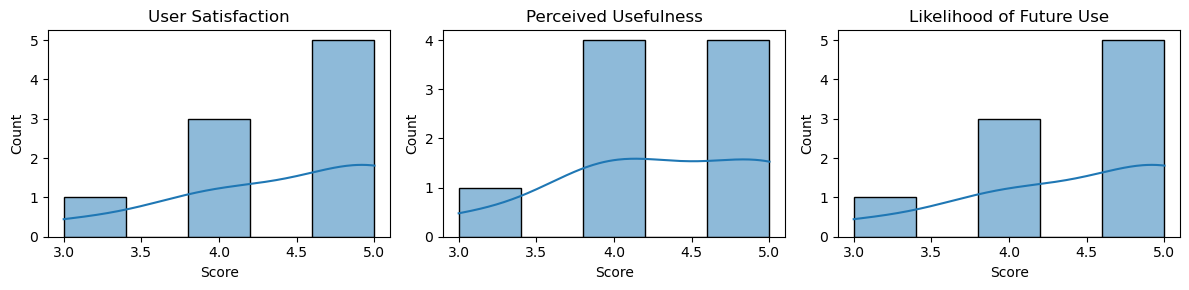

In [37]:
titles = {
    'satisfaction-1': 'User Satisfaction',
    'userfulness-2': 'Perceived Usefulness',
    'futureUse-1': 'Likelihood of Future Use'
}

# Convert numeric columns
numeric_columns = list(titles.keys())
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Plot distributions with custom titles
plt.figure(figsize=(12, 3))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], bins=5, kde=True)
    plt.title(titles[col])
    plt.xlabel("Score")
plt.tight_layout()
plt.show()

In [11]:
from collections import Counter

# Flatten and count most common words in satisfaction responses
satisfaction_features = df['satisfaction-2'].dropna().str.split(',').explode()
feature_counts = Counter(satisfaction_features)

# Display top 5 most common features
feature_counts.most_common(5)

[('Dễ sử dụng', 6),
 ('Thiết kế/giao diện', 5),
 ('Những gợi ý từ Cura', 4),
 ('Chức năng kết nối với người thân', 3),
 ('Thông tin Cura cung cấp', 3)]

In [39]:
future_use_features = df['futureUse-2'].dropna().str.split(',').explode()
feature_counts = Counter(future_use_features)

# Display top 5 most common features
feature_counts.most_common(5)

[('Theo dõi thói quen sức khoẻ', 9),
 ('Khuyến khích gia đình tầm soát kịp thời', 7),
 ('Tìm hiểu về nguy cơ ung thư', 4)]